In [50]:
import numpy as np
import pandas as pd
import sys

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결
plt.rcParams["font.family"] = 'AppleGothic' # Mac
# plt.rcParams["font.family"] = 'Malgun Gothic' # Windows

In [52]:
# HN16_ALL : 가구조사, 건강면접조사, 건강형태조사, 검진조사, 영양조사
# HN16_24RC : 식품섭취조사
# HN16_FFQ : 식품섭취빈도조사
df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat')
#df_24RC = pd.read_sas("./HN16_24RC.sas7bdat")
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat')
# df_24RC_code = pd.read_excel("./HN16_24RC(식품_음식코드).xlsx")

- 식품섭취조사(NH24RC)를 기반으로 섭취빈도와 양을 식품섭취빈도조사(HN16_FFQ)로 통계낸 것으로 파악됨
- ID값으로 가구조사 데이터와 식품섭취빈도조사 데이터 merge(left join)

In [53]:
df = pd.merge(df_ALL, df_ffq, on= 'ID', how='left')

- 1201개의 컬럼으로 join되었음
- ID외에 2개의 데이터프레임에서 중복된 칼럼은 뒤에 _x, _y로 이름이 변경되었음
- 필요한 칼럼만 남기기 전 전체 데이터로 탐색 시작

In [54]:
df.head()

,mod_d_x,ID,ID_fam_x,year_x,region_x,town_t_x,apt_t_x,psu_x,sex_x,age_x,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
0,b'2018.02.01.',b'A651172801',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2018.02.01.',b'A651172802',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',2.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2018.02.01.',b'A651183001',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,41.0,...,12.879218,3671.647791,2226.426572,459.311661,84.990392,2158.129699,1.628015,1.13383,13.896055,79.150355
3,b'2018.02.01.',b'A651183002',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2018.02.01.',b'A651183003',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- b'2018.02.01.' 와 같은 식으로 나오는 건, 인코딩/디코딩 문제
- 아래 구문으로 해당 칼럼 수정할 수 있음
- df[columns_name] = df[columns_name].str.decode('utf-8')

In [17]:
df.shape

(8150, 1201)

In [95]:
#  1 : 남자, 2 : 여자
print("total : ", df.sex_x.count()) # 성별정보 전체 카운트, 8150으로 전체 row와 일치
print(pd.value_counts(df.sex_x.values)) # 각 성별 카운트

total :  8150
2.0    4485
1.0    3665
dtype: int64


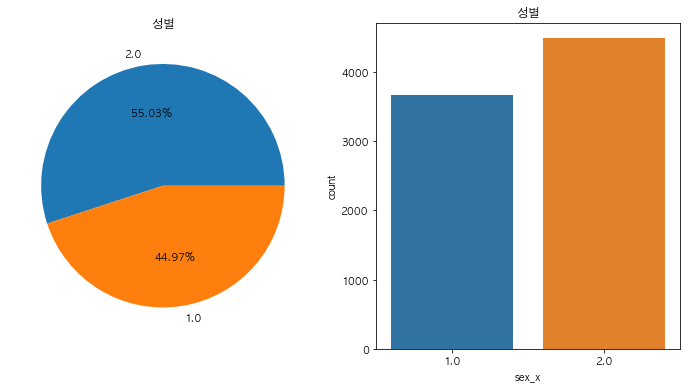

In [55]:
# 성별 그래프
f,ax=plt.subplots(1,2,figsize=(12,6))

# 비율
df['sex_x'].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('성별')
ax[0].set_ylabel('')

# 숫자
sns.countplot('sex_x', data=df, ax=ax[1])
ax[1].set_title('성별')
plt.show()

- 대상연령별 조사 항목이 매우 상이하므로 나이대를 감안하여 주제선정, 및 데이터 확인 필요
![표3-1. 제7기 1차년도(2016) 건강설문조사 항목](https://user-images.githubusercontent.com/23414560/47694949-2cf56780-dc43-11e8-8e4b-5a4e0862708d.png "표3-1. 제7기 1차년도(2016) 건강설문조사 항목")

In [97]:
#  나이
print("total : ", df.age_x.count()) # 나이정보 전체 카운트, 8150으로 전체 row와 일치
print(pd.value_counts(df.age_x.values, sort=False).sort_index()) # 각 나이 카운트
df.groupby([df.age_x]).count() # 각 나이별 데이터값 포함되어 있는 내용 카운트, 대략적으로 어느 항목들 조사하고 설문응답했는지 확인 가능

total :  8150
1.0     109
2.0      93
3.0     121
4.0     122
5.0     108
6.0     115
7.0     111
8.0     109
9.0     104
10.0     85
11.0     92
12.0     80
13.0     99
14.0     92
15.0     86
16.0     78
17.0     89
18.0     75
19.0     67
20.0     48
21.0     67
22.0     66
23.0     68
24.0     82
25.0     69
26.0     78
27.0     76
28.0     66
29.0     61
30.0     69
       ... 
51.0    112
52.0     96
53.0    122
54.0    110
55.0    131
56.0    112
57.0    127
58.0    128
59.0    115
60.0    106
61.0    118
62.0    102
63.0     94
64.0    102
65.0    121
66.0     85
67.0    105
68.0    119
69.0    103
70.0     90
71.0     94
72.0     91
73.0     92
74.0     87
75.0     87
76.0     65
77.0     83
78.0     61
79.0     68
80.0    281
Length: 80, dtype: int64


,mod_d_x,ID,ID_fam_x,year_x,region_x,town_t_x,apt_t_x,psu_x,sex_x,age_month_x,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
age_x,,,,,,,,,,,,,,,,,,,,,
1.0,109,109,109,109,109,109,109,109,109,109,...,0,0,0,0,0,0,0,0,0,0
2.0,93,93,93,93,93,93,93,93,93,93,...,0,0,0,0,0,0,0,0,0,0
3.0,121,121,121,121,121,121,121,121,121,121,...,0,0,0,0,0,0,0,0,0,0
4.0,122,122,122,122,122,122,122,122,122,122,...,0,0,0,0,0,0,0,0,0,0
5.0,108,108,108,108,108,108,108,108,108,108,...,0,0,0,0,0,0,0,0,0,0
6.0,115,115,115,115,115,115,115,115,115,115,...,0,0,0,0,0,0,0,0,0,0
7.0,111,111,111,111,111,111,111,111,111,0,...,0,0,0,0,0,0,0,0,0,0
8.0,109,109,109,109,109,109,109,109,109,0,...,0,0,0,0,0,0,0,0,0,0
9.0,104,104,104,104,104,104,104,104,104,0,...,0,0,0,0,0,0,0,0,0,0


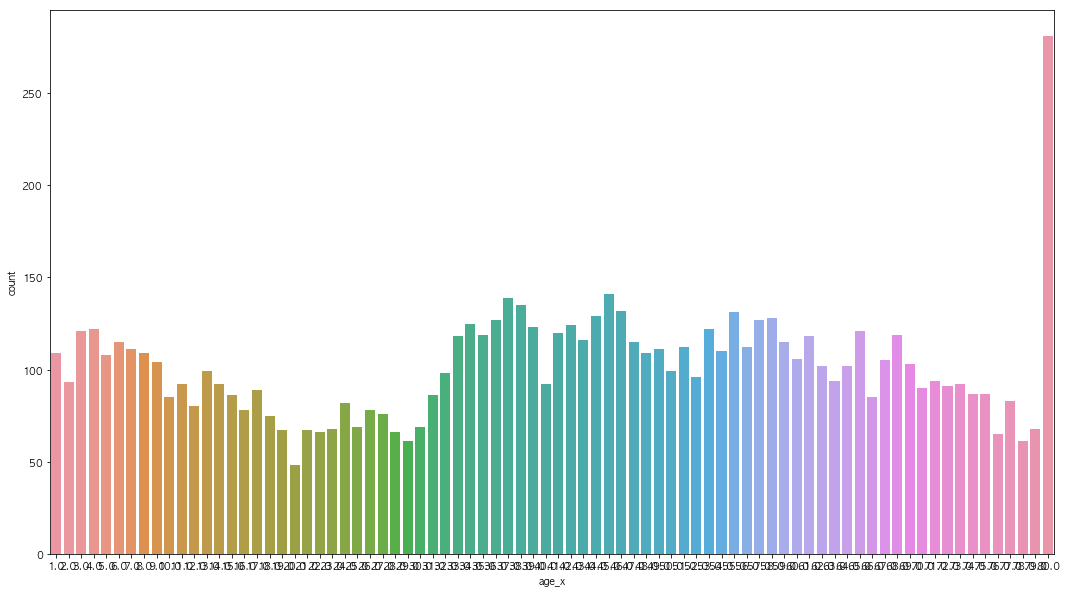

In [101]:
# 나이별 countplot
f,ax=plt.subplots(1,1,figsize=(18,10))
sns.countplot('age_x', data=df)
plt.show()

In [18]:
df.head()

,mod_d_x,ID,ID_fam_x,year_x,region_x,town_t_x,apt_t_x,psu_x,sex_x,age_x,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
0,b'2018.02.01.',b'A651172801',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2018.02.01.',b'A651172802',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',2.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2018.02.01.',b'A651183001',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,41.0,...,12.879218,3671.647791,2226.426572,459.311661,84.990392,2158.129699,1.628015,1.13383,13.896055,79.150355
3,b'2018.02.01.',b'A651183002',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2018.02.01.',b'A651183003',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 아래 3개의 구문으로 csv파일로 저장

In [5]:
df.to_csv("df.csv", header=True, index=True)

In [44]:
df_ALL.to_csv("df_ALL.csv", header=True, index=True)

In [45]:
df_ffq.to_csv("df_ffq.csv", header=True, index=True)